# Gender Classification using Keras

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


# Changing the directory to the place where the data is stored

In [2]:

os.chdir('../input/utkface_aligned_cropped')
os.chdir('UTKFace')


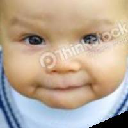

In [9]:
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

In [4]:
onlyfiles = os.listdir()

In [5]:
len(onlyfiles)

23708

In [7]:
print(onlyfiles)

['56_0_1_20170120222838627.jpg.chip.jpg', '36_1_0_20170108224009217.jpg.chip.jpg', '22_1_0_20170117193908380.jpg.chip.jpg', '35_0_3_20170109132951262.jpg.chip.jpg', '1_1_2_20161219142156353.jpg.chip.jpg', '56_0_0_20170104182229743.jpg.chip.jpg', '57_0_1_20170117171247961.jpg.chip.jpg', '26_1_0_20170117174852519.jpg.chip.jpg', '72_1_0_20170110180409214.jpg.chip.jpg', '72_0_0_20170111195358992.jpg.chip.jpg', '36_0_0_20170117162433077.jpg.chip.jpg', '41_0_4_20170117022116049.jpg.chip.jpg', '32_0_3_20170119200432788.jpg.chip.jpg', '22_0_3_20170119162746691.jpg.chip.jpg', '28_0_3_20170117020056667.jpg.chip.jpg', '35_1_0_20170117190625474.jpg.chip.jpg', '36_0_1_20170116030116849.jpg.chip.jpg', '27_1_1_20170117000109588.jpg.chip.jpg', '30_0_0_20170117142922282.jpg.chip.jpg', '43_0_0_20170109002737188.jpg.chip.jpg', '45_0_0_20170116235729518.jpg.chip.jpg', '36_0_4_20170117203502182.jpg.chip.jpg', '29_0_3_20170104232720881.jpg.chip.jpg', '80_1_0_20170117175552763.jpg.chip.jpg', '37_0_1_20170117

#  storing the gender(label) into a list 

In [10]:
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]
gender

['1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0'

1. I would like to make clear that the image data is in its name means the first box of the second cell, the second gender, the second one, so the first step is that we are trying to separate the labels from the images so that they are stored in the classes as much as we need them
2. We can split the data into Gender Classes - 0 Male 1 Female


In [11]:
classes = []
for i in gender:
    i = int(i)
    classes.append(i)



In [12]:
classes

[1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,


**CONVERT IMAGES TO VECTORS**

In [14]:
X_data =[]
for file in onlyfiles:
    face = cv2.imread(file)
    face = cv2.resize(face, (32, 32) )
    X_data.append(face)


In [16]:
X_data[1]

array([[[ 97, 106, 122],
        [103, 112, 126],
        [ 85, 100, 124],
        ...,
        [123, 159, 176],
        [144, 185, 207],
        [143, 185, 207]],

       [[ 97, 105, 117],
        [ 94, 100, 111],
        [ 88, 102, 126],
        ...,
        [122, 158, 175],
        [141, 182, 204],
        [133, 176, 197]],

       [[ 89,  96, 106],
        [ 95, 100, 110],
        [ 93, 106, 129],
        ...,
        [118, 154, 172],
        [135, 176, 198],
        [140, 183, 204]],

       ...,

       [[218, 225, 228],
        [195, 208, 216],
        [201, 217, 230],
        ...,
        [ 75, 107, 150],
        [ 51,  91, 133],
        [ 40,  78, 127]],

       [[218, 223, 226],
        [199, 208, 217],
        [208, 219, 231],
        ...,
        [ 23,  51,  91],
        [ 27,  52,  94],
        [ 25,  45,  78]],

       [[221, 225, 226],
        [214, 220, 225],
        [209, 217, 225],
        ...,
        [ 23,  43,  81],
        [ 26,  38,  69],
        [ 12,  24,  52]]

In [20]:
len(X_data)

23708

# The squeeze() function is used to remove single-dimensional entries from the shape of an array.

In [18]:

X = np.squeeze(X_data)

In [21]:
X.shape

(23708, 32, 32, 3)

In [22]:
# normalize data
X = X.astype('float32')
X /= 255


In [23]:
classes[:10]


[1, 1, 1, 0, 1, 1, 1, 1, 1, 0]

In [24]:
categorical_labels = to_categorical(classes, num_classes=2)


In [25]:
categorical_labels[:10]


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [26]:
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])


In [27]:
len(x_train)+len(x_test) + len(x_valid) == len(X)


True

In [37]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(32,32,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 64)        832       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 128)       32896     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 256)         131328    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 256)         0         
__________

In [38]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [39]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=30,
         validation_data=(x_valid, y_valid),)

Train on 15008 samples, validate on 7000 samples
Epoch 1/30
15008/15008 [==============================] - 3s 211us/sample - loss: 0.5683 - acc: 0.7065 - val_loss: 0.4451 - val_acc: 0.8100
Epoch 2/30
15008/15008 [==============================] - 2s 157us/sample - loss: 0.4121 - acc: 0.8107 - val_loss: 0.3410 - val_acc: 0.8529
Epoch 3/30
15008/15008 [==============================] - 2s 155us/sample - loss: 0.3505 - acc: 0.8426 - val_loss: 0.3300 - val_acc: 0.8522
Epoch 4/30
15008/15008 [==============================] - 2s 154us/sample - loss: 0.3240 - acc: 0.8564 - val_loss: 0.2950 - val_acc: 0.8716
Epoch 5/30
15008/15008 [==============================] - 2s 153us/sample - loss: 0.2998 - acc: 0.8669 - val_loss: 0.2795 - val_acc: 0.8799
Epoch 6/30
15008/15008 [==============================] - 3s 168us/sample - loss: 0.2838 - acc: 0.8747 - val_loss: 0.2822 - val_acc: 0.8791
Epoch 7/30
15008/15008 [==============================] - 2s 164us/sample - loss: 0.2744 - acc: 0.8787 - val_lo

In [40]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8770588


In [41]:
labels =["Male",  # index 0
        "Female",      # index 1
        ]

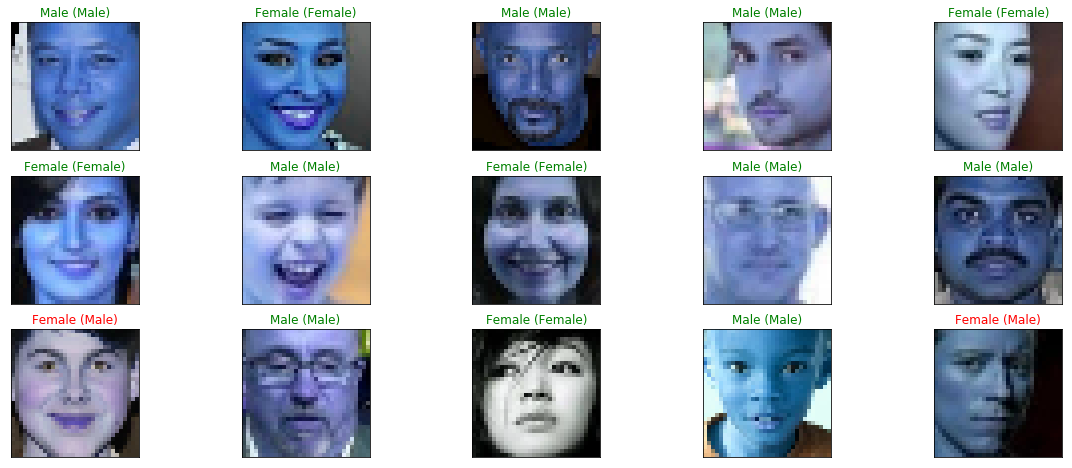

In [42]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()


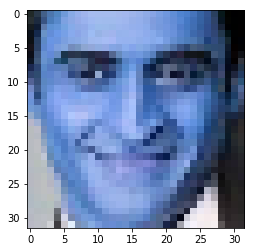

In [56]:
plt.imshow(np.squeeze(x_test[190]))
plt.show()

In [68]:
index=np.random.choice(x_test.shape[0])
index

960

In [69]:
pred=np.argmax(y_hat[index])
true=np.argmax(y_test[index])

In [70]:
print(pred,true)

1 1
